In [1]:
import numpy as np
import tensorflow as tf
from random import randrange
from environment_generation import get_easy_environment_state, get_hard_environment_state
from preprocessing import one_hot_encode_environment_state
from visualization import visualize_environment
from simulation import simulation, show_environment_state
from lawn_mowing_environment import environment

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


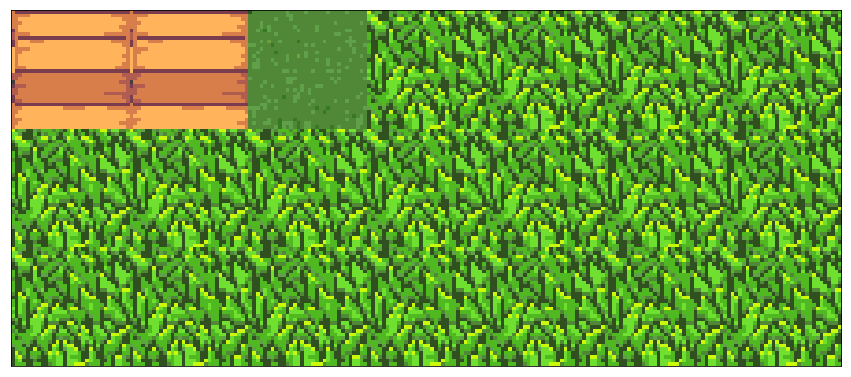

In [3]:
starting_environment_state = get_easy_environment_state()
show_environment_state(starting_environment_state)

In [6]:
np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10]])

array([[ 1,  2,  3,  4],
       [ 4,  5,  6,  7],
       [ 7,  8,  9, 10]])

In [5]:
np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10]]).shape

(3, 4)

In [ ]:
# initalize the simulation
agent_starting_position = [8,8]
agent_starting_direction = 'S'
sim = simulation(starting_environment_state, environment(agent_starting_position, agent_starting_direction, starting_environment_state.shape), visualize_environment())

In [ ]:
observation = sim.reset()

done = False
while not done: # it takes around 10,000 steps to solve the environment with a random agent
    
    # one_hot_encode_environment_state(starting_environment_state)
    
    action = # element of (1,2,3)
    observation, reward, done = sim.step(action)
    
print("total loss:", reward)
sim.get_simulation_history_visualization("agent_videos/basic_mlp_agent.mp4", 60) # generate video of agent solving environment
#startfile("agent_videos\\basic_mlp_agent.mp4") # view video

In [11]:
one_hot_encode_environment_state(starting_environment_state).shape

(352, 5)

In [3]:
X = one_hot_encode_environment_state(starting_environment_state)

In [6]:
tf.convert_to_tensor(X, np.float32)

<tf.Tensor 'X_1:0' shape=(?, 352) dtype=float32>

In [11]:
n_neurons_1 = 352
n_neurons_2 = 256
n_neurons_3 = 256
n_neurons_4 = 128
n_features = 5
# begin the session & init placeholders
net = tf.Session()
X = tf.placeholder(dtype=tf.float32, shape=[5, 352], name="X")
Y = tf.placeholder(dtype=tf.float32, shape=[None], name="Y")
# Initializers
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=1)
bias_initializer = tf.zeros_initializer()
# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_features, n_neurons_1, 5]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))
# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))
# Hidden layers
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))
# Output layer
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out), name="out")

#mse = tf.reduce_mean(tf.squared_difference(out, Y, name="mse")) # Loss function

# Optimizer
opt = tf.train.AdamOptimizer().minimize(reward) # reward = loss in this case, I should probably rename it
# Init
net.run(tf.global_variables_initializer())
# make prediction
net.run(tf.convert_to_tensor(X, np.float32))

# net.run(opt, feed_dict={X: inputs, Y: outputs}) # one step in traditional training
    
# tf.train.Saver().save(net, model_location + model_name) # save model

ValueError: Shape must be rank 2 but is rank 3 for 'MatMul_6' (op: 'MatMul') with input shapes: [5,352], [5,352,5].

In [ ]:
# loading saved model

# init_g = tf.global_variables_initializer()
# init_l = tf.local_variables_initializer()
# # start tensorflow session
# net = tf.Session()
# net.run(init_g)
# net.run(init_l)
# # load model
# saver = tf.train.import_meta_graph(model_location + model_name + '.meta')
# saver.restore(net, model_location + model_name)
# # re-initialize tensors
# graph = tf.get_default_graph()
# Y = graph.get_tensor_by_name("Y:0")
# X = graph.get_tensor_by_name("X:0")
# mse = graph.get_tensor_by_name("mse:0")
# out = graph.get_tensor_by_name("out:0")
# self.mse = np.array(net.run(mse, feed_dict={X: inputs, Y: outputs})).mean()
# self.ppf = lambda x: (net.run(out, feed_dict={X: np.array([x]).T})[0])*100